In [2]:
import pandas as pd
import numpy as np
%pylab inline


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# preparing the data

In [3]:
data = pd.read_csv('BA5_2.csv')
data = data.groupby('DateTime').agg('mean')
data.reset_index(inplace = True)
data.drop(['True Vertical Depth', 'DateTime', 'Rate Of Penetration.1'], axis = 1, inplace = True)
data['Hole Depth'] = data['Hole Depth'].apply(lambda x: int(x))
data = data.groupby('Hole Depth').agg('mean')
data.reset_index(inplace = True)
data.head()

,Hole Depth,Bit Depth,MudWatcher Temperature (Degrees F),MudAid Temperature (Degrees F),ES Meter Temperature (Degrees F),Mud Density,Mud Watcher Density (lb/gal),MudWatcher Viscosity,ES Meter Voltage,MudAid Viscosity @ 600RPM (D.R.),...,Total Pump Output,Hook Load,Standpipe Pressure,Rate Of Penetration,Rotary RPM,Rotary Torque,Azimuth,Inclination,In Slip,Differential Pressure
0,106,98.466111,0.0,134.6,138.5,8.7,5.17,0.0,90.35,49.14,...,316.338333,57.131667,442.659722,10.601111,10.857222,1.016694,16.51,1.0,0.0,239.239778
1,109,109.250000,0.0,134.6,138.5,8.7,5.17,0.0,90.35,49.14,...,400.363333,56.850000,622.500000,181.441667,30.323333,1.958500,16.51,1.0,0.0,116.263333
2,112,112.283333,0.0,134.6,138.5,8.7,5.17,0.0,90.35,49.14,...,400.363333,56.383333,609.166667,184.413333,30.265000,2.156167,16.51,1.0,0.0,108.463333
3,116,116.150000,0.0,134.6,138.5,8.7,5.17,0.0,90.35,49.14,...,400.486667,55.700000,623.541667,248.553333,30.278333,2.203333,16.51,1.0,0.0,127.040000
4,120,120.333333,0.0,134.6,138.5,8.7,5.17,0.0,90.35,49.14,...,400.363333,55.033333,620.416667,251.471667,30.208333,2.514167,16.51,1.0,0.0,133.910000


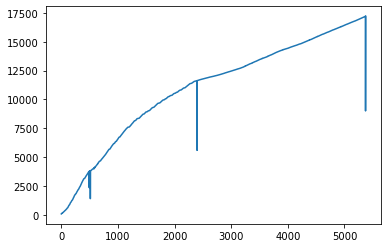

In [4]:
plt.plot(np.array(data['Bit Depth']))

In [5]:
def make_df(data, shift, cols1, cols2, main_col = 'Hole Depth'):
    result = pd.DataFrame()
    result[main_col] = data[main_col]
    for col in cols1:
        result[col] = data[col]
    for col in cols2:
        result[col] = np.nan
        for i in result[main_col]:
            try:
                result.loc[result[main_col] == i, col] = data[col][data[main_col] == (i + shift)].iloc[0]
            except:
                # print('no data for depht = ' + str(i))
                continue
                
    return result.dropna()

In [6]:
cols1 = ['Hole Depth', 'Bit Depth', 'Weight on Bit', 'Block Height',
       'Trip Speed', 'Total Pump Output', 'Hook Load', 'Standpipe Pressure',
       'Rate Of Penetration', 'Rotary RPM', 'Rotary Torque', 'Azimuth',
       'Inclination', 'In Slip', 'Differential Pressure']

cols2 = ['Mud Density', 'MudAid PV Value', 'MudAid Temperature (Degrees F)','PV (API)', 
          'MudAid Viscosity @ 6RPM (D.R.)','ES Meter Voltage',
          'MudAid Viscosity @ 200RPM (D.R.)',
          'MudAid Viscosity @ 300RPM (D.R.)', 'MudAid Viscosity @ 600RPM (D.R.)']

data10 = make_df(data, 50, cols1, cols2)

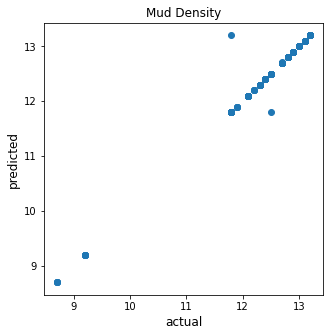

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


X = data10[cols1]

Y = data10[['Mud Density']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = DecisionTreeRegressor(max_depth=35)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

plt.figure(figsize=(5,5))
plt.plot(y_test, y_pred,'o')
# plt.ylim(-10,150)
# plt.xlim(-10,150)
plt.title('Mud Density', fontsize = 12)
plt.xlabel('actual', fontsize = 12)
plt.ylabel('predicted', fontsize = 12)
# plt.savefig('example_ Mud Density all magnitudes.png', dpi = 500)
plt.show()

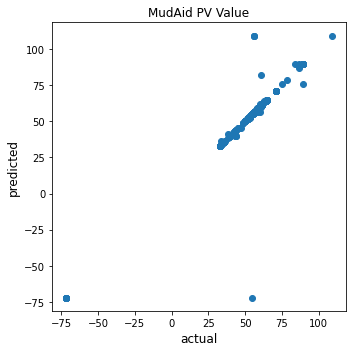

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


X = data10[cols1]

Y = data10[['MudAid PV Value']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = DecisionTreeRegressor(max_depth=60)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

plt.figure(figsize=(5,5))
plt.plot(y_test, y_pred,'o')
# plt.ylim(-100,150)
# plt.xlim(-100,150)
plt.title('MudAid PV Value', fontsize = 12)
plt.xlabel('actual', fontsize = 12)
plt.ylabel('predicted', fontsize = 12)
plt.tight_layout()
plt.savefig('example_ MudAid PV Value all magnitudes.png', dpi = 500)
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error

def get_mse(y_test, y_pred):
    me = []
    for i in range(len(y_test.columns)):
        mse1 = mean_squared_error(y_pred.T[i], y_test[y_test.columns[i]])
        # print(mse1)
        me.append(mse1)
    return min(me), max(me), np.mean(me), me

/tmp/ipykernel_5403/3309246966.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[X.columns[i] + ' x ' + X.columns[j]] = X[X.columns[i]] * X[X.columns[j]]


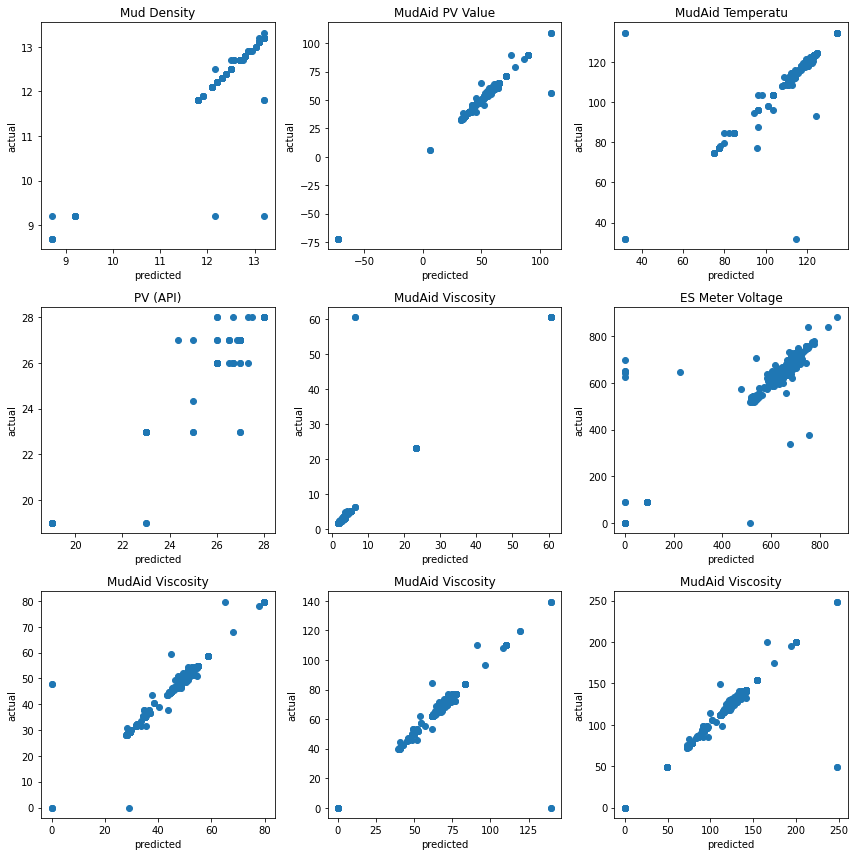

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


X = data10[cols1]

for i in range(len(X.columns)):
    for j in range(i):
        X[X.columns[i] + ' x ' + X.columns[j]] = X[X.columns[i]] * X[X.columns[j]]

Y = data10[cols2]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = DecisionTreeRegressor(max_depth=20, min_samples_split=4)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

_, _, mse_ave, mse = get_mse(y_test, y_pred)
# print(mse_ave)


fig, ax = plt.subplots(3,3, figsize = (12,12))

for i in range(9):
    # print(36%i)
    # print(int(36/(i+6)))
    ax[ int(i/3), i % 3].plot(y_pred.T[i], y_test[y_test.columns[i]], 'o')
    ax[ int(i/3), i % 3].set_xlabel('predicted', )
    ax[ int(i/3), i % 3].set_ylabel('actual', )
    ax[ int(i/3), i % 3].set_title(y_test.columns[i][:16] , )
plt.tight_layout()

# for i in range(len(Y.columns)):
#     print(mse[i])
#     plt.figure(figsize=(5,5))
#     plt.plot(y_pred.T[i], y_test[y_test.columns[i]], 'o')
#     plt.title(y_test.columns[i], fontsize = 14)
#     plt.show()